In [1]:
from __future__ import print_function
import os
import sys
import cv2
from matplotlib import pyplot as plt
import numpy as np

from local_config import CURRENT_DIR
sys.path.append(os.path.join(CURRENT_DIR, ".."))

try:
    from config import Config
    from data_loader import WaymoStixelDataset
except:
    print("failed to load module")
    
from albumentations import (
    Resize,
    Compose,
    CLAHE,
    HueSaturationValue,
    RandomBrightness,
    RandomContrast,
    RandomGamma,
    ToFloat,
    Normalize,
    GaussNoise,
    RandomShadow,
    RandomRain,
)

import utility
import importlib

2022-03-11 18:52:00.051025: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
dt_config = Config()
dt_config.display()


Configurations:
CURRENT_DIR                    /home/menz/StixelNet/obstacle_detection_stixelnet
DATA_PATH                      /home/menz/StixelNet/obstacle_detection_stixelnet/data/StixelNet_Waymo
GROUND_TRUTH_PATH              /home/menz/StixelNet/obstacle_detection_stixelnet/data/StixelNet_Waymo/waymo_train.txt
NUM_EPOCHS                     50
SAVED_MODELS_PATH              saved_models




In [3]:
## Train set

import importlib
import sys
importlib.reload(sys.modules['data_loader'])
from data_loader import WaymoStixelDataset

train_aug = Compose(
    [
        GaussNoise(p=1.0),
        RandomShadow(p=0.5),
        RandomRain(p=0.5, rain_type="drizzle"),
        RandomContrast(limit=0.2, p=0.5),
        RandomGamma(gamma_limit=(80, 120), p=0.5),
        RandomBrightness(limit=0.2, p=0.5),
        HueSaturationValue(
            hue_shift_limit=5, sat_shift_limit=20, val_shift_limit=10, p=0.5
        ),
        CLAHE(p=0.5, clip_limit=2.0),
        Normalize(p=1.0),
    ]
)
    

train_set = WaymoStixelDataset(
        data_path=dt_config.DATA_PATH,
        ground_truth_path=dt_config.GROUND_TRUTH_PATH,
        batch_size=4,
        transform=None,
        customized_transform=utility.HorizontalFlip(p=0.5),
    )


X,y = train_set[0]

print(np.shape(X))
print(np.shape(y))


/home/menz/miniconda3/envs/StixelNet-TF/lib/python3.9/site-packages/albumentations/augmentations/transforms.py:1826: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/home/menz/miniconda3/envs/StixelNet-TF/lib/python3.9/site-packages/albumentations/augmentations/transforms.py:1800: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(


(4, 1280, 1920, 3)
(4, 240)


In [8]:
imgs, labels = train_set[3]
print(np.shape(imgs))
print(np.shape(labels))



(4, 1280, 1920, 3)
(4, 240)


array([ 840.,  728.,  888.,  872.,  856.,  856.,  848.,  550., 1256.,
       1128., 1256., 1056., 1120., 1120., 1152., 1256., 1216., 1232.,
       1216., 1216., 1216., 1216.,  550., 1200., 1192., 1192., 1184.,
       1168., 1168., 1168., 1152., 1152., 1152., 1136., 1128., 1128.,
       1128.,  550.,  550.,  550.,  816., 1096., 1088.,  928.,  956.,
       1072., 1072., 1048., 1048., 1048., 1048.,  712.,  550., 1032.,
       1032., 1016.,  792.,  800., 1000.,  948.,  550.,  550.,  832.,
        800.,  968.,  776.,  550.,  550.,  856.,  952.,  550.,  768.,
        768.,  848.,  752.,  904.,  550.,  744.,  736.,  728.,  728.,
        880.,  550.,  736.,  736.,  736.,  736.,  728.,  728.,  720.,
        550.,  550.,  550.,  550.,  550.,  550.,  550.,  550.,  550.,
        550.,  550.,  550.,  550.,  550.,  550.,  550.,  550.,  550.,
        550.,  550.,  550.,  550.,  550.,  550.,  550.,  550.,  550.,
        550.,  550.,  550.,  550.,  550.,  550.,  550.,  550.,  550.,
        550.,  550.,

(4, 1280, 1920, 3)
(4, 240)
(1280, 1920, 3)
(240,)
x           : (240,)
batchLabels : (240,)
(1280, 1920, 3)
(240,)
x           : (240,)
batchLabels : (240,)
(1280, 1920, 3)
(240,)
x           : (240,)
batchLabels : (240,)
(1280, 1920, 3)
(240,)
x           : (240,)
batchLabels : (240,)


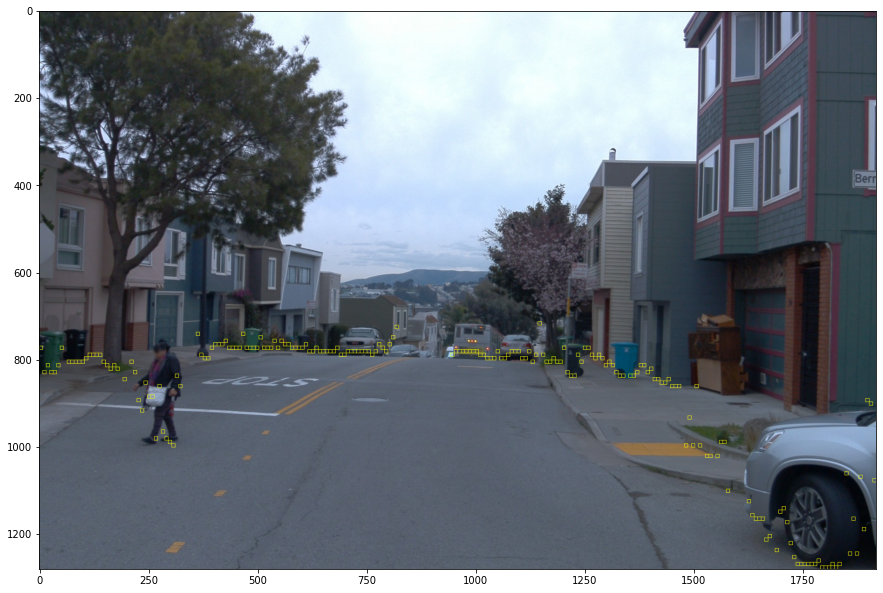

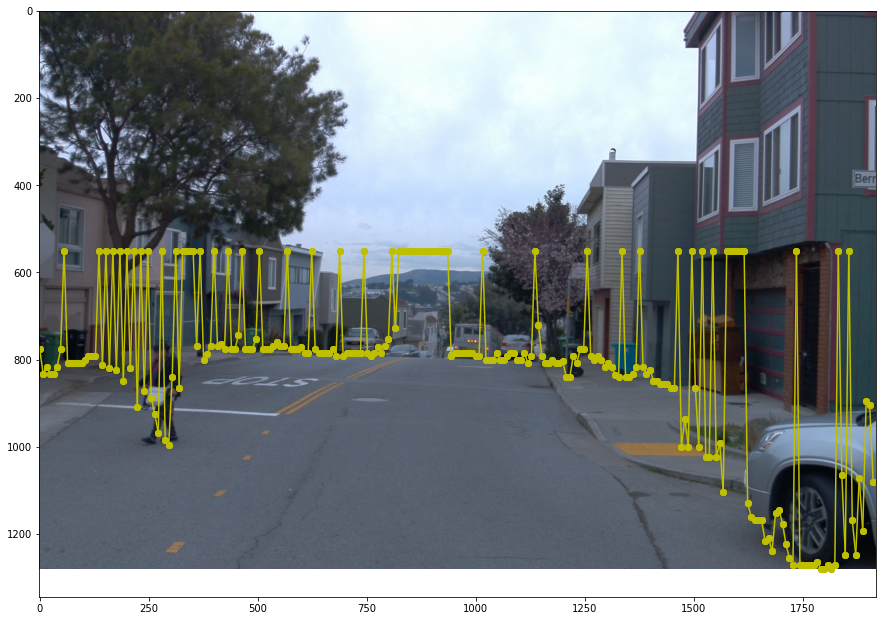

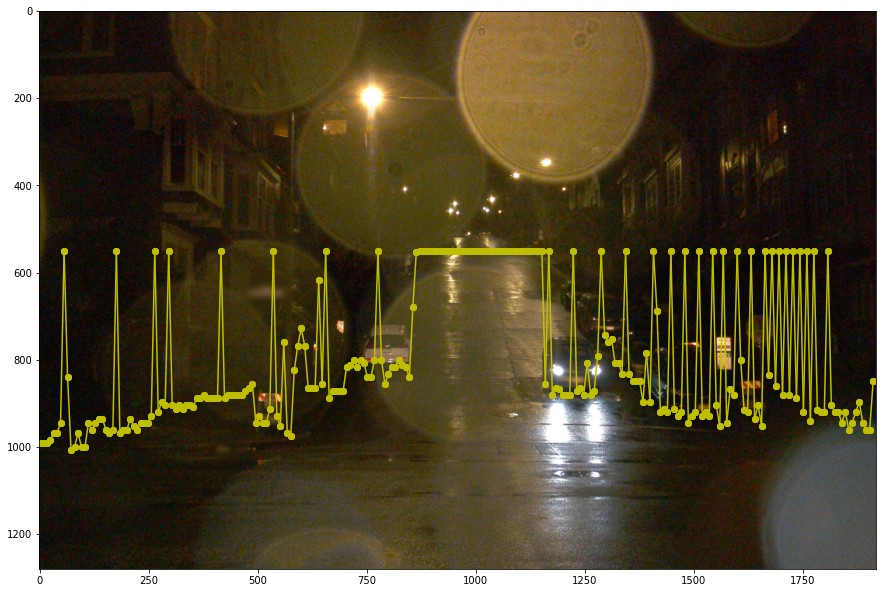

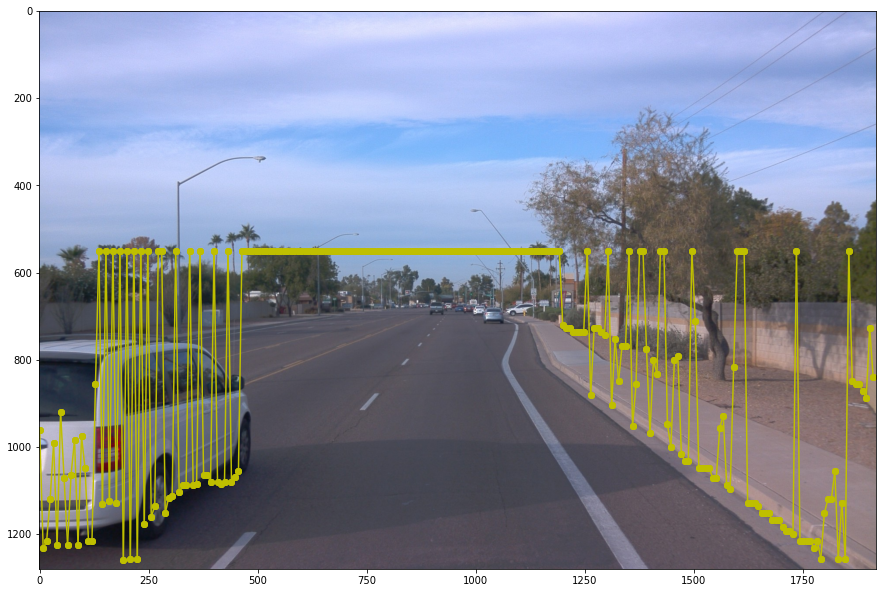

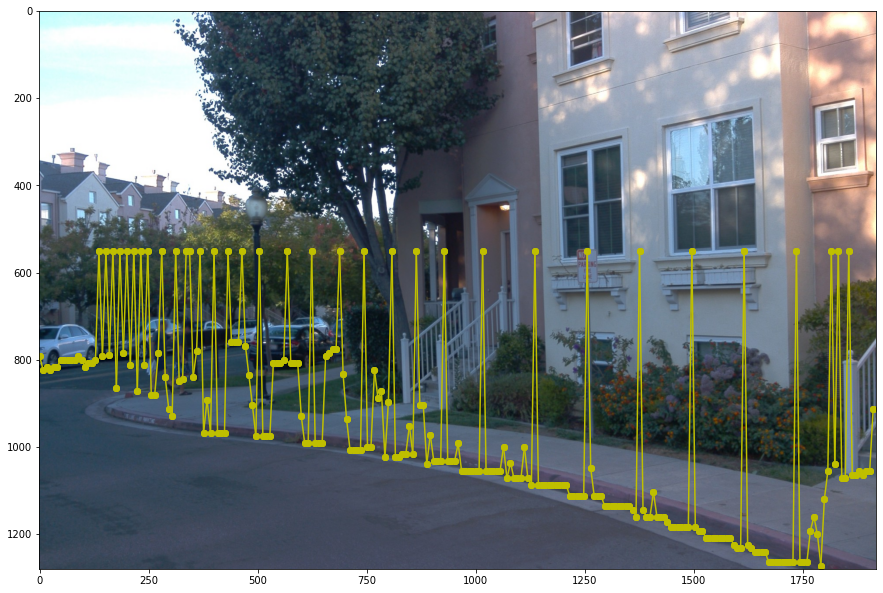

In [11]:
idx = 3

imgs, labels = train_set[idx]
print(np.shape(imgs))
print(np.shape(labels))

visualized_stixel = train_set.visualize_one_image(idx)

plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(visualized_stixel, cv2.COLOR_BGR2RGB))
#cv2.imwrite("test.jpg", visualized_stixel)


for b in range(train_set.batch_size):

    batchImg = imgs[b]
    batchLabels = labels[b]

    print(np.shape(batchImg))
    print(np.shape(batchLabels))

    plt.figure(figsize=(15,15))
    plt.imshow(cv2.cvtColor(batchImg, cv2.COLOR_BGR2RGB))
    #labels = positions[0,:,1]

    origImageWidth = batchImg.shape[1]
    labelWidth = batchLabels.size

    x = list(range(0, origImageWidth, int(origImageWidth/labelWidth)))
    print("x           : {}".format(np.shape(x)))
    print("batchLabels : {}".format(np.shape(batchLabels)))
    plt.plot(x, batchLabels, 'yo')
    for i in range(0, len(x), 1):
        plt.plot(x[i:i+2], batchLabels[i:i+2], 'y-o')


